# Ficha técnica

__identificador__: TPC7;

__título__: Processamento de datasets;

__data início__: 2021-11-19;

__data fim__: 2021-11-22;

__autor__: Alexandra Cordeiro;

__resumo__: Este TPC consiste na leitura de datasets, no seu processamento e produção de dados estatísticos através da média e de gráficos.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [3]:

#Dataset=[Aluno]
#Aluno=[id,nome,curso,[tpc1,tpc2,tpc3,tpc4]]


def getAluno(texto):
    textoLimpo=texto.replace("\"", "")
    campos= textoLimpo.split(",")
    aluno=[]
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3]=lista
    return aluno
    
getAluno("\"a5\",\"Tawseef Rebouças\",\"ENGBIOM\",13,14,13,17")   
    


def lerDataset(fnome):
    f=open(fnome, encoding="utf-8")
    bd = []
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))
    
    return bd
    
    
    

In [4]:
BD=[]
BD=lerDataset("../algoritmos/alunos.csv")
print(BD)

[['a1', 'Aysha Melanie Gilberto', 'LEI', [12, 8, 19, 8]], ['a2', 'Igor André Cantanhede', 'ENGFIS', [12, 16, 18, 20]], ['a3', 'Laurénio Narciso', 'ENGFIS', [8, 14, 15, 14]], ['a4', 'Jasnoor Casegas', 'LCC', [14, 20, 17, 11]], ['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ['a6', 'Eryk Clementino', 'LEI', [10, 19, 11, 14]], ['a7', 'Ianna Noivo', 'ENGBIOM', [15, 15, 17, 16]], ['a8', 'Ayla Thaissa Reina', 'ENGBIOM', [12, 8, 8, 18]], ['a9', 'Cássia Viviane Coitã', 'ENGFIS', [19, 9, 14, 10]], ['a10', 'Koby Vindima', 'LEI', [9, 14, 20, 13]], ['a11', 'Gustavo Martim Hernandez', 'ENGBIOM', [11, 8, 14, 11]], ['a12', 'Siddarta Beiriz', 'LEI', [17, 10, 16, 16]], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', [15, 15, 18, 19]], ['a14', 'Kaylla Pessego', 'LCC', [10, 14, 17, 15]], ['a15', 'Bianca Cristina Primitivo', 'ENGBIOM', [16, 9, 18, 10]], ['a16', 'Magna Galhardo', 'ENGFIS', [20, 18, 9, 14]], ['a17', 'Grace Isabel Patriarca', 'LCC', [19, 13, 9, 10]], ['a18', 'Saubhagya Buco', 'LEI', [

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [30]:
# Listagem da informação
def chaveORD(a):
    return a[1]
def listarDataset(bd):
    bd.sort(key=chaveORD)
    print('_id      dataEMD    nome          apto')
    print('______________________________________')
    for a in bd:
        print(a[0] + " | " + a[1] + " | " + a[2] + " | " + str((sum(a[3])/4)))
              
listarDataset(BD)

_id      dataEMD    nome          apto
______________________________________
a53 | Abner Umbelina | ENGBIOM | 14.75
a69 | Adele Belchior | ENGBIOM | 15.25
a88 | Afonso Adriano Marca | ENGBIOM | 12.75
a62 | Ahmadou Bamba Calcinha | LCC | 14.25
a72 | Ana Gabriel Quirino | LCC | 13.5
a96 | Anaïs Sintra | LCC | 14.75
a32 | Ariane Sofia Foja | LEI | 17.5
a8 | Ayla Thaissa Reina | ENGBIOM | 11.5
a1 | Aysha Melanie Gilberto | LEI | 11.75
a15 | Bianca Cristina Primitivo | ENGBIOM | 13.25
a93 | Bivhan Reimbau | LCC | 12.0
a61 | Bradley Tabau | LCC | 15.75
a73 | Carolina Antoo | ENGBIOM | 16.25
a86 | Clésio Rodeiro | LCC | 13.0
a91 | Constança Filipa Melado | LEI | 12.5
a9 | Cássia Viviane Coitã | ENGFIS | 13.0
a13 | Daniela Patrícia Montes | ENGBIOM | 16.75
a71 | Derrick Urias | ENGFIS | 10.75
a25 | Dhriti Magano | ENGFIS | 14.25
a36 | Diana Beatriz Boavista | LCC | 16.5
a83 | Dolorinda Adolfo | ENGFIS | 13.75
a75 | Dárcio Wosvaldo Tudela | LEI | 13.25
a54 | Dânia Lucy Montelobo | LEI | 15.75

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.

In [80]:
def consultarDataset(d, id):
    i=0
    for i in range(len(d)):
        if d[i][0]==id:
            média=((sum(d[i][3])/len(d[i][3])))
            return d[i], ('Média',média)
        
id=input('Qual o id que deseja consultar?')
consultarDataset(BD,id)

Qual o id que deseja consultar?a5


(['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ('\nMédia', 14.25))

## Top 10 (exercício 4)

Especifica um função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.

In [82]:

def bdMedias(d):
    Bdados=[]
    for aluno in d:
        Aluno=[aluno[0],aluno[1],aluno[2], (sum(aluno[3])/4)]
        Bdados.append(Aluno)
    return Bdados
        
def chaveOrd(a):
    return a[3]

def top10(d):
    b=bdMedias(d)
    b.sort(key=chaveOrd, reverse=True)
    for i in range (0,10):
        print(b[i])

top10(BD)

['a80', 'Maria Carolina Josué', 'ENGFIS', 18.0]
['a47', 'Moisés João Cornelio', 'LEI', 18.0]
['a32', 'Ariane Sofia Foja', 'LEI', 17.5]
['a74', 'Vânia Sofia Porfirio', 'ENGBIOM', 17.5]
['a56', 'Hakeem Brazão', 'LEI', 17.25]
['a84', 'Laudário Frasão', 'LCC', 17.0]
['a13', 'Daniela Patrícia Montes', 'ENGBIOM', 16.75]
['a45', 'Imayame Hespanha', 'ENGFIS', 16.75]
['a41', 'Lachezar Rosas', 'ENGBIOM', 16.75]
['a36', 'Diana Beatriz Boavista', 'LCC', 16.5]


## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [91]:
def distribPorCurso(d):
    distribuicao={}
    for a in d:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]=distribuicao[a[2]]+1
        else:
            distribuicao[a[2]]=1
    return distribuicao
    
d=distribPorCurso(BD)
print(d)
        
    

{'ENGBIOM': 25, 'LCC': 20, 'LEI': 22, 'ENGFIS': 32, 'Eryk Clementino': 1}


## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [98]:
def distribPorMedia(d):
    m=[]
    for i in range (len(d)):
        média=((sum(d[i][3])/len(d[i][3])))
        m.append(int(média))
        i=i+1
        m.sort()
    distribuicao1={}
    for b in m:
        if b in distribuicao1.keys():
            distribuicao1[b]=distribuicao1[b]+1
        else:
            distribuicao1[b]=1
    return distribuicao1

distribPorMedia(BD)

{9: 2, 10: 1, 11: 9, 12: 15, 13: 20, 14: 21, 15: 15, 16: 11, 17: 4, 18: 2}

# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

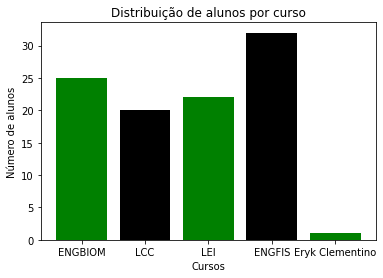

In [104]:
import matplotlib.pyplot as plt
def plotDistribPorCurso(d):
    a=distribPorCurso(d)
    tuplo=a.items()
    x=[]
    y=[]
    for elem in tuplo:
        x.append(elem[0])
    for elem in tuplo:
        y.append(elem[1])
    plt.bar(x,y,color=['green','black'])
    plt.xlabel('Cursos')
    plt.ylabel('Número de alunos')
    barWidth=0.25
    plt.title('Distribuição de alunos por curso')
    plt.show()

plotDistribPorCurso(BD)

## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

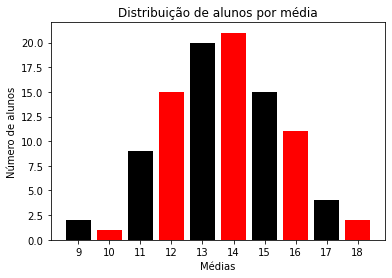

In [100]:
import matplotlib.pyplot as plt
def plotDistribPorMedia(d):
    a=distribPorMedia(d)
    tuplo=a.items()
    x=[]
    y=[]
    for elem in tuplo:
        x.append(elem[0])
    for elem in tuplo:
        y.append(elem[1])
    plt.bar(x,y,color=['black','red'])
    barWidth=0.25
    plt.xticks(range(9,19))
    plt.xlabel('Médias')
    plt.ylabel('Número de alunos')
    plt.title('Distribuição de alunos por média')
    plt.show()

plotDistribPorMedia(BD)